In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("data_core.csv")
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


In [2]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


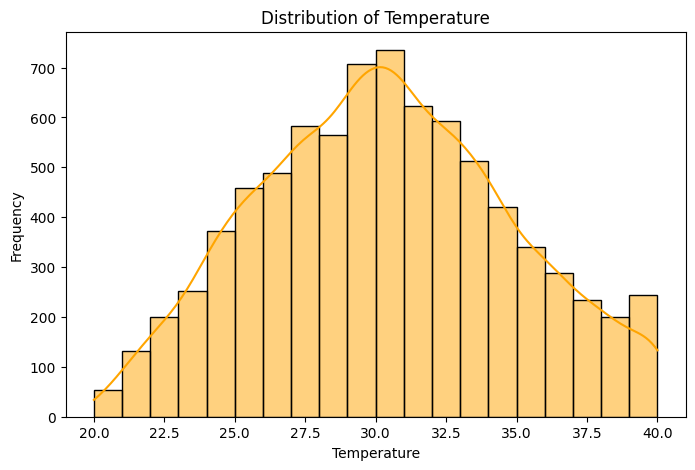

In [5]:
# Histogram of Temperature
plt.figure(figsize=(8,5))
sns.histplot(df['Temparature'], bins=20, kde=True, color='orange')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

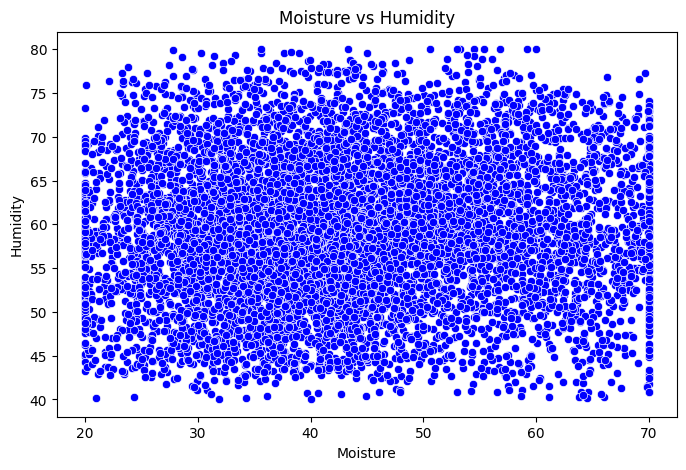

In [6]:
# Scatter plot of Moisture vs Humidity
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Moisture'], y=df['Humidity'], color='blue')
plt.title('Moisture vs Humidity')
plt.xlabel('Moisture')
plt.ylabel('Humidity')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10896\3314268303.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Soil Type'], y=df['Nitrogen'], palette='coolwarm')


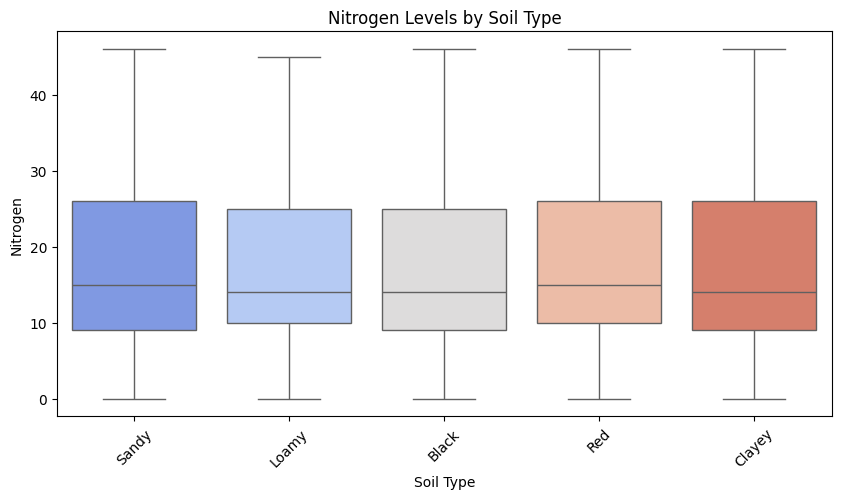

In [7]:
# Boxplot of Nitrogen by Soil Type
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'], y=df['Nitrogen'], palette='coolwarm')
plt.title('Nitrogen Levels by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Nitrogen')
plt.xticks(rotation=45)
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10896\2645130479.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Crop Type', y='Potassium', data=df_grouped, palette='viridis')


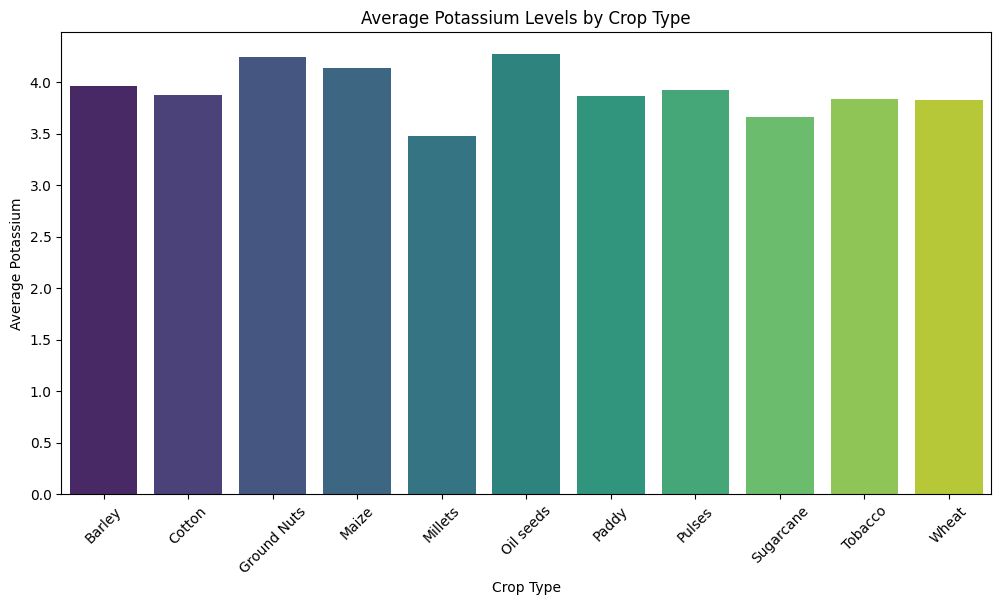

In [8]:
# Bar plot of Average Potassium by Crop Type
plt.figure(figsize=(12,6))
df_grouped = df.groupby('Crop Type')['Potassium'].mean().reset_index()
sns.barplot(x='Crop Type', y='Potassium', data=df_grouped, palette='viridis')
plt.title('Average Potassium Levels by Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Average Potassium')
plt.xticks(rotation=45)
plt.show()

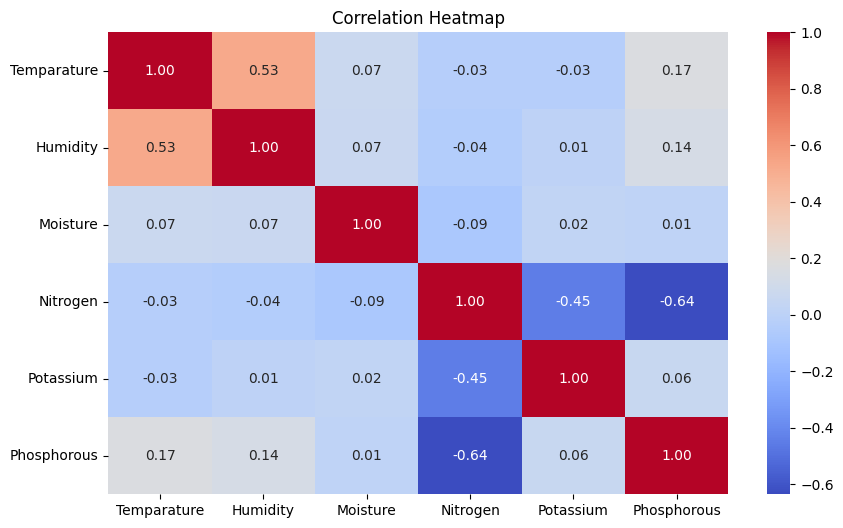

In [9]:
# Heatmap of Correlation between Numeric Features
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

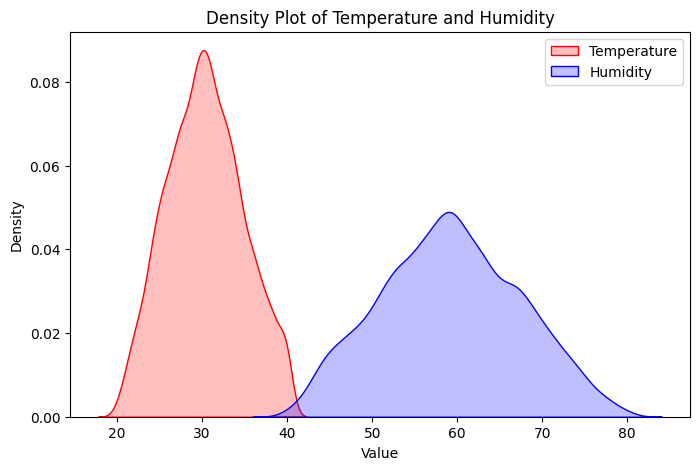

In [10]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Temparature'], fill=True, color='red', label='Temperature')
sns.kdeplot(df['Humidity'], fill=True, color='blue', label='Humidity')
plt.title('Density Plot of Temperature and Humidity')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

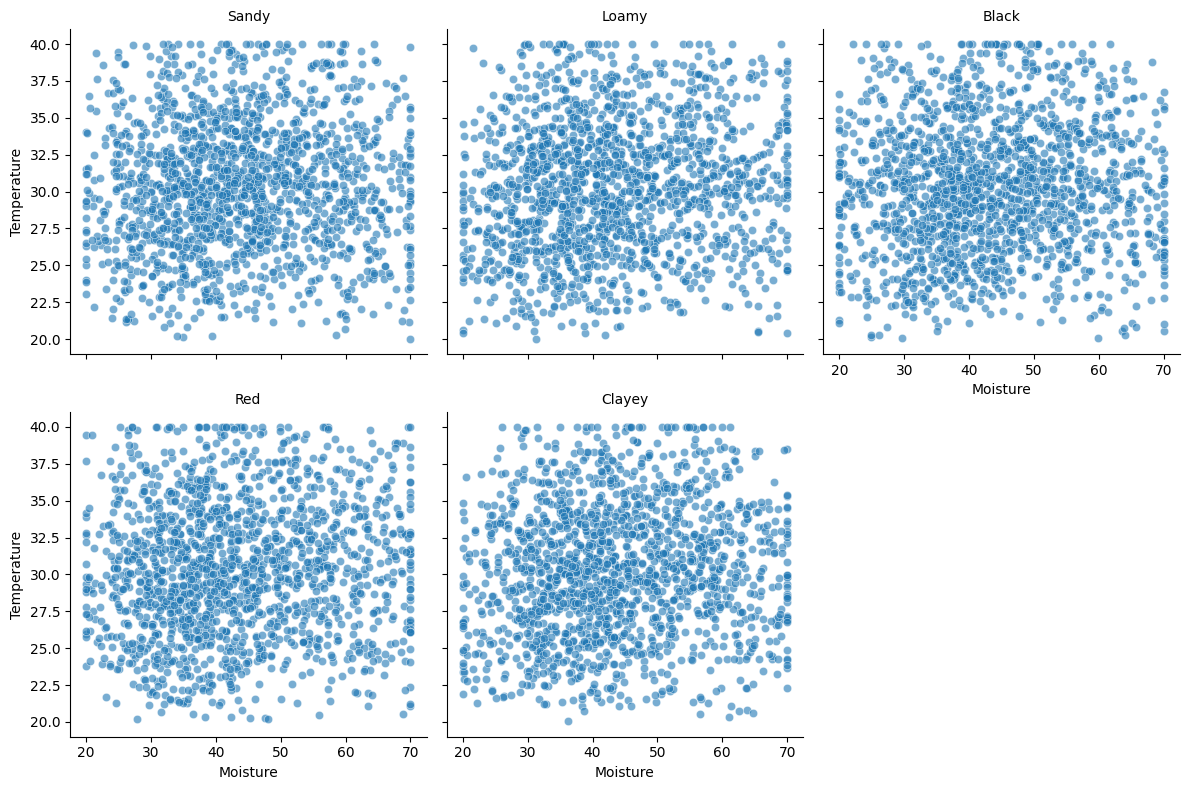

In [12]:
g = sns.FacetGrid(df, col='Soil Type', col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x='Moisture', y='Temparature', alpha=0.6)
g.set_axis_labels("Moisture", "Temperature")
g.set_titles(col_template="{col_name}")
plt.show()

<Figure size 1200x600 with 0 Axes>

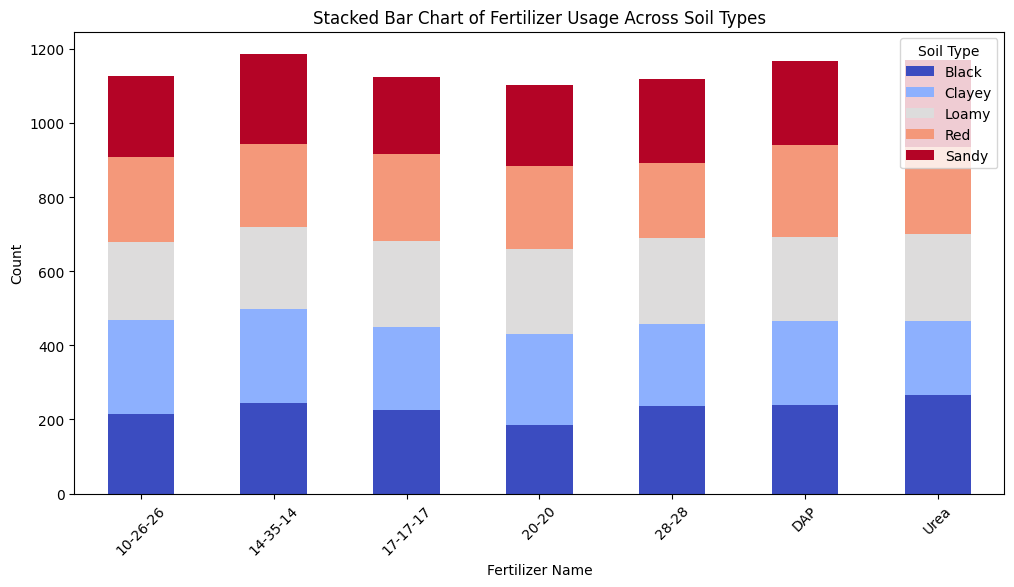

In [13]:
plt.figure(figsize=(12,6))
fertilizer_soil = pd.crosstab(df['Fertilizer Name'], df['Soil Type'])
fertilizer_soil.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(12,6))
plt.title('Stacked Bar Chart of Fertilizer Usage Across Soil Types')
plt.xlabel('Fertilizer Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Soil Type")
plt.show()